# Data preprocessing

## I. Imports & functions

In [42]:
import pandas as pd
import pycountry_convert as pc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import plotly.express as px
from sklearn.metrics import mean_squared_error
import skfda

pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

data = pd.read_csv('data/final_data.csv')
data = data[data.year != 2020] # 16 out of 26 indexes missing

## II. Imputation

In [43]:
# # resampling the data and filling missing values; getting rid of duplicates at the same time
# new_data = data.resample('60min').mean() 
# new_data = new_data.fillna(method = 'pad') # using only past data

In [44]:
# https://conferences.oreilly.com/strata/strata-ny-2019/cdn.oreillystatic.com/en/assets/1/event/300/Handling%20data%20gaps%20in%20time%20series%20using%20imputation%20Presentation.pdf
# https://www.kaggle.com/oguzkaanmavice/time-series-deal-with-missing-values
# https://impyute.readthedocs.io/en/master/api/time_series_imputation.html
# https://www.aptech.com/blog/introduction-to-the-fundamentals-of-panel-data/
# https://drive.google.com/file/d/1-NqVpF3__iKll7qvAu3Ebcx76DE-d2yH/view

### CO2 emission - best imputation

<AxesSubplot:title={'center':'co2_emission'}>

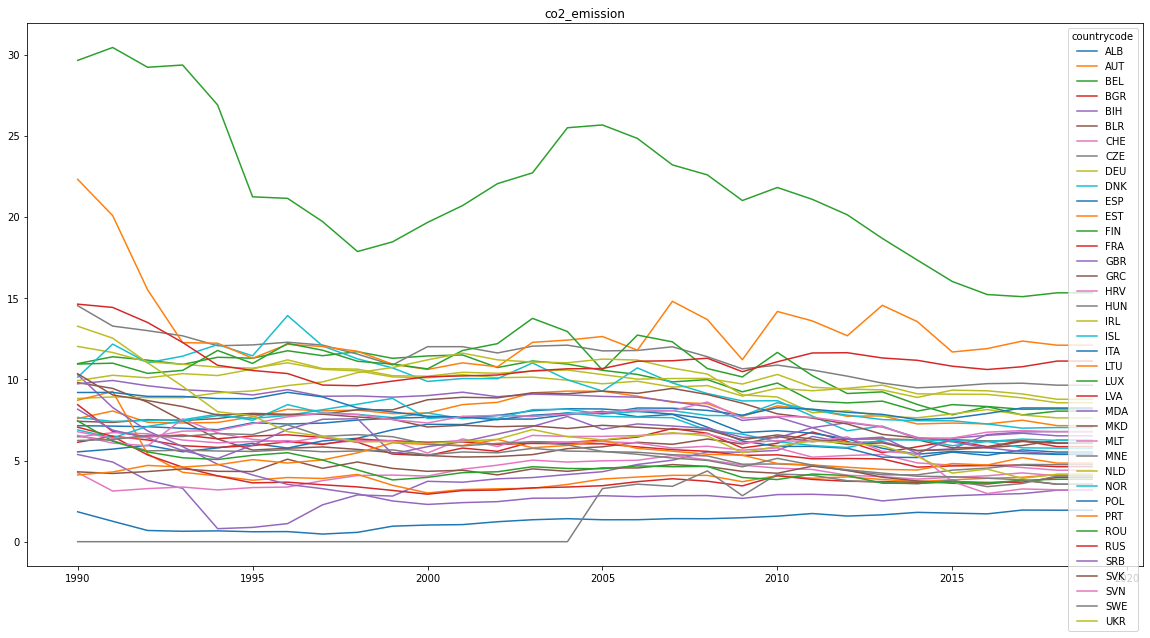

In [45]:
# data_co2 = data[['year','co2_emission']].copy()
# data.loc[data.year == 2018, 'co2_emission'] = np.NaN

data['co2_emission'].fillna(method = 'pad', inplace = True)
# mean_squared_error(data[data.year == 2018].co2_emission, data_co2[data_co2.year == 2018].co2_emission)
# 0.0457

# data.co2_emission = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 13])
# mean_squared_error(data[data.year == 2018].co2_emission, data_co2[data_co2.year == 2018].co2_emission)
# 6.0187

# data.co2_emission.interpolate(method = 'spline',order = 2, inplace = True)
# mean_squared_error(data[data.year == 2018].co2_emission, data_co2[data_co2.year == 2018].co2_emission)
# 7.1593

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='co2_emission').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='co2_emission')


### Employment_agro - best imputation

<AxesSubplot:title={'center':'employment_agro'}>

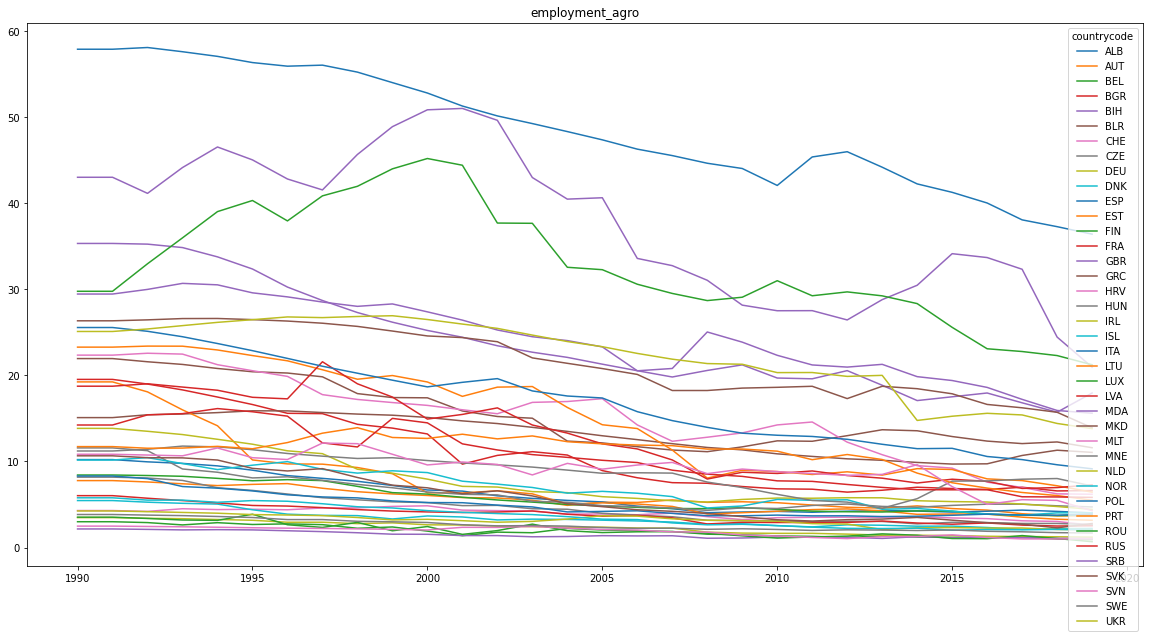

In [46]:
# data_agro = data[['year','employment_agro']].copy()
# data.loc[data.year == 1991, 'employment_agro'] = np.NaN

data['employment_agro'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[data.year == 1991].employment_agro, data_agro[data_agro.year == 1991].employment_agro)
# 0.4787

# data.employment_agro = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 14])
# mean_squared_error(data[data.year == 1991].employment_agro, data_agro[data_agro.year == 1991].employment_agro)
# 42.0754

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='employment_agro').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='employment_agro')

### Employment_industry - best imputation

<AxesSubplot:title={'center':'employment_industry'}>

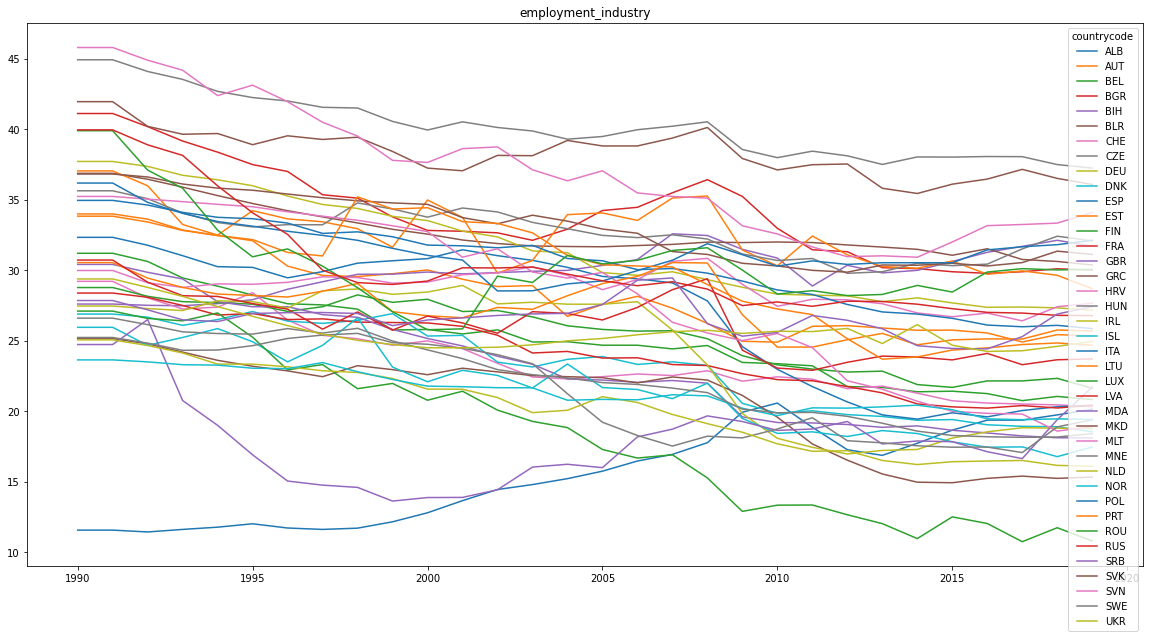

In [47]:
# data_ind = data[['year','employment_industry']].copy()
# data.loc[data.year == 1991, 'employment_industry'] = np.NaN

data['employment_industry'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[data.year == 1991].employment_industry, data_ind[data_ind.year == 1991].employment_industry)
# 0.8279

# data.employment_industry = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 15])
# mean_squared_error(data[data.year == 1991].employment_industry, data_ind[data_ind.year == 1991].employment_industry)
# 23.7939

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='employment_industry').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='employment_industry')

### Employment_services - best imputation

<AxesSubplot:title={'center':'employment_services'}>

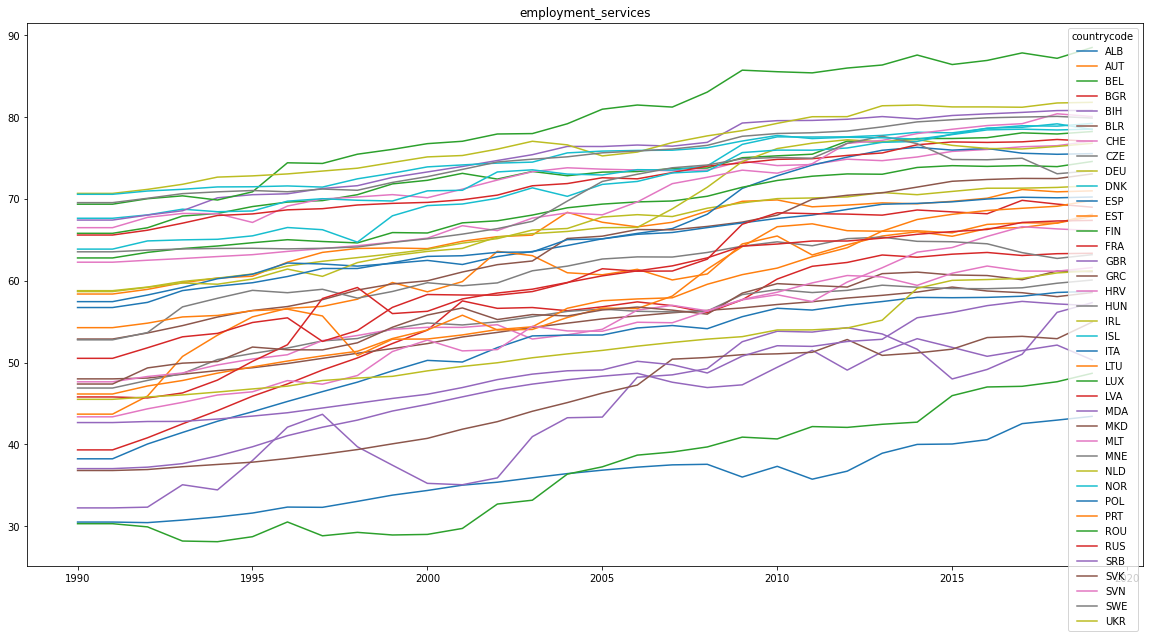

In [48]:
# data_serv = data[['year','employment_services']].copy()
# data.loc[data.year == 1991, 'employment_services'] = np.NaN

data['employment_services'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[data.year == 1991].employment_services, data_serv[data_serv.year == 1991].employment_services)
# 0.7322

# data.employment_services = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 16])
# mean_squared_error(data[data.year == 1991].employment_services, data_serv[data_serv.year == 1991].employment_services)
# 54.3532

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='employment_services').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='employment_services')

### Unemployment - best imputation

<AxesSubplot:title={'center':'unemployment'}>

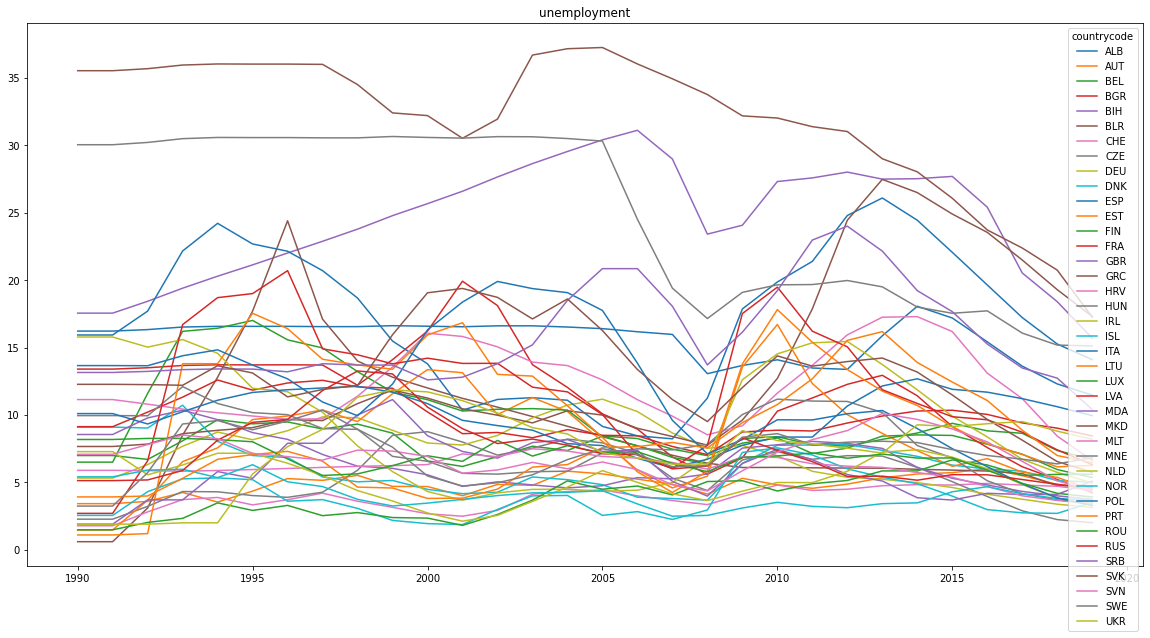

In [49]:
# data_uemp = data[['year','unemployment']].copy()
# data.loc[data.year == 1991, 'unemployment'] = np.NaN

data['unemployment'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[data.year == 1991].unemployment, data_uemp[data_uemp.year == 1991].unemployment)
# 2.0499

# data.unemployment = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 24])
# mean_squared_error(data[data.year == 1991].unemployment, data_uemp[data_uemp.year == 1991].unemployment)
# 31.0302

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='unemployment').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='unemployment')

### Export - best imputation

<AxesSubplot:title={'center':'export'}>

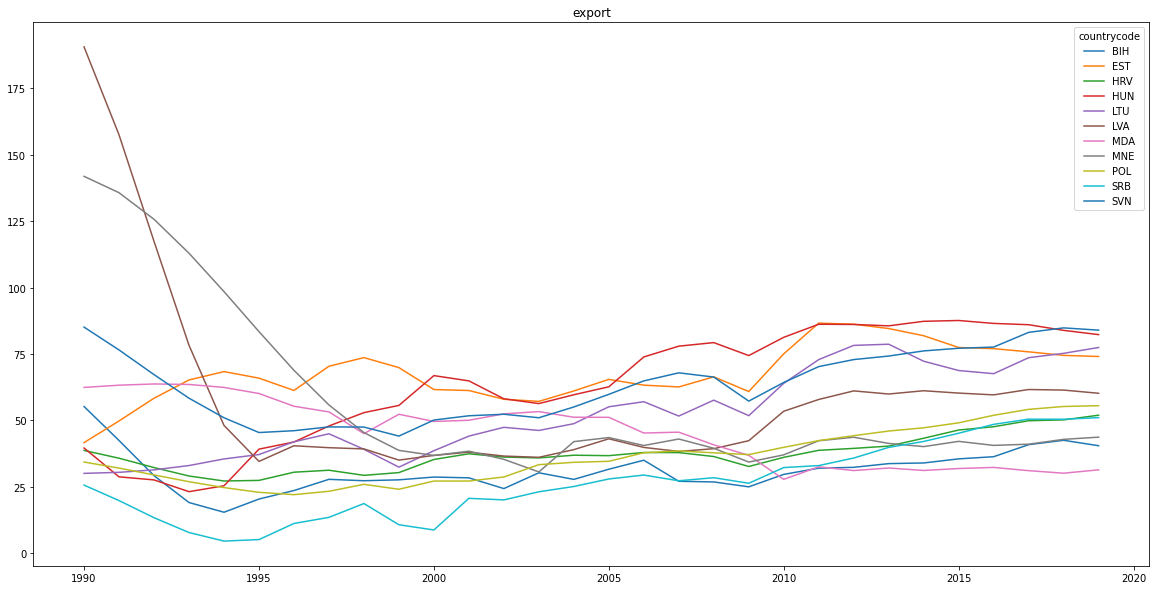

In [50]:
# data_exp = data[['year','export']].copy()
# data.loc[(data.year >= 2000) & (data.year < 2006), 'export'] = np.NaN

# data['export'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)].export, data_exp[(data.year >= 2000) & (data.year < 2006)].export)
# 83.8566

# data.export = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 17])
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)].export, data_exp[(data.year >= 2000) & (data.year < 2006)].export)
# 290.0548

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
# colors = ['blue' if x == 0 else 'red' for x in data_test.export]
data_test = data_test[data_test.export > 0].countrycode

data.export.interpolate(method = 'spline', order = 3, inplace = True)
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)].export, data_exp[(data.year >= 2000) & (data.year < 2006)].export)
# 32.7018

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='export').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='export')

###  Import - best imputation

<AxesSubplot:title={'center':'import'}>

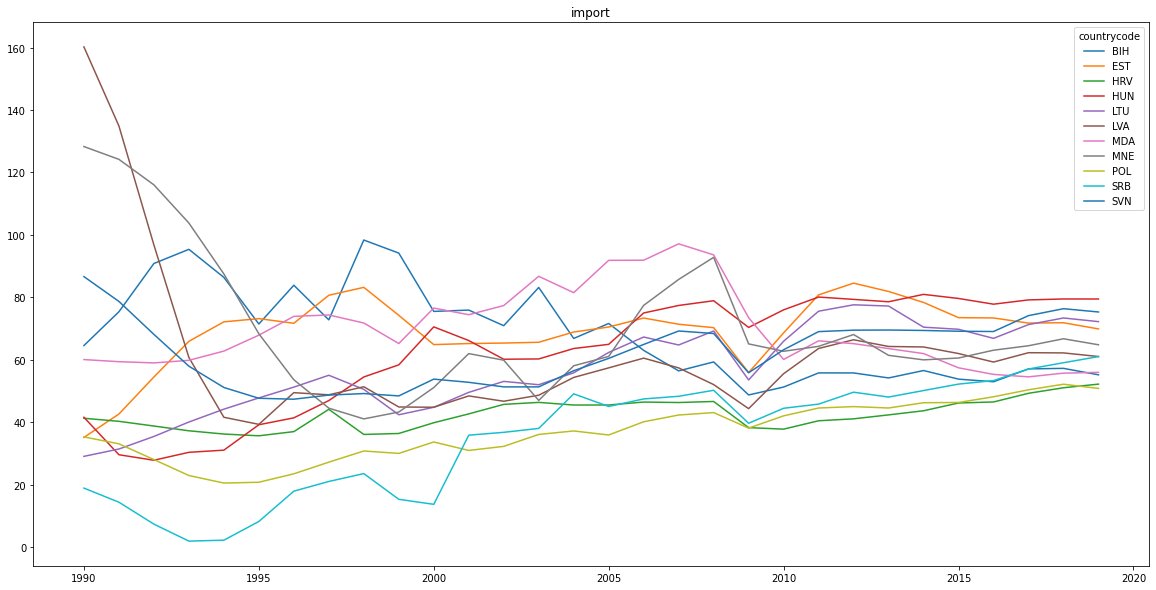

In [51]:
# data_imp = data[['year','import']].copy()
# data.loc[(data.year >= 2000) & (data.year < 2006), 'import'] = np.NaN

# data['import'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)]['import'], data_imp[(data_imp.year >= 2000) & (data_imp.year < 2006)]['import'])
# 101.4846

# data['import'] = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 18])
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)]['import'], data_imp[(data_imp.year >= 2000) & (data_imp.year < 2006)]['import'])
# 109.2971

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['import'] > 0].countrycode

data['import'].interpolate(method = 'polynomial',order = 2, inplace = True)
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)]['import'], data_imp[(data_imp.year >= 2000) & (data_imp.year < 2006)]['import'])
# 46.2979

# data['import'].isna().sum()

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='import').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='import')

###  Inflation - best imputation

<AxesSubplot:title={'center':'inflation'}>

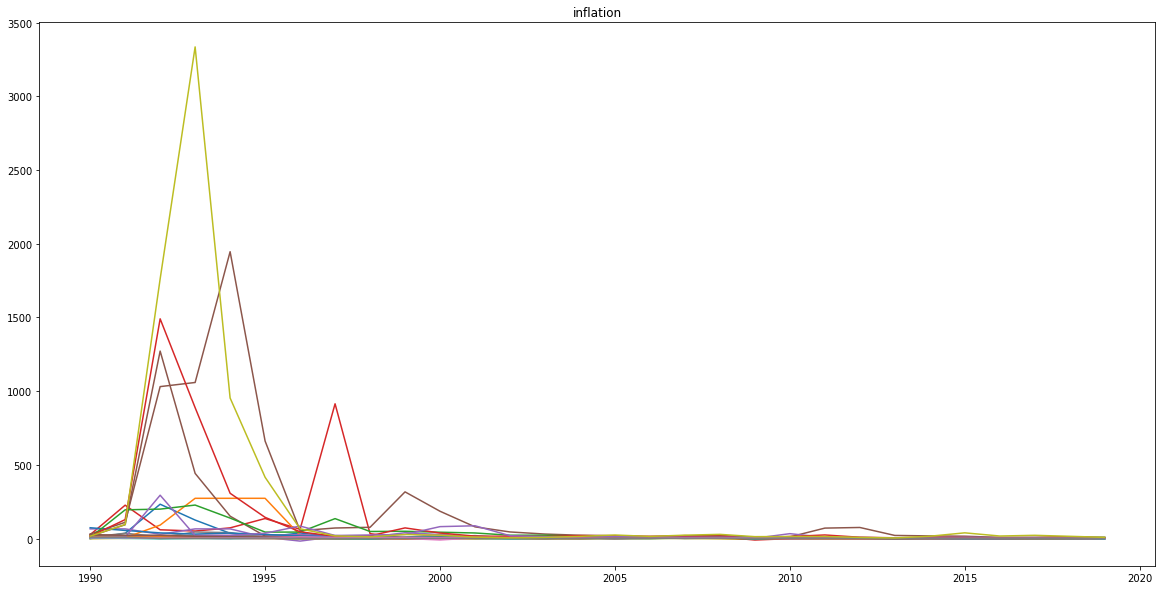

In [52]:
# data_inf = data[['year','inflation']].copy()
# data.loc[(data.year > 2000) & (data.year < 2006), 'inflation'] = np.NaN

# data['inflation'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year > 2000) & (data.year < 2006)].inflation, data_inf[(data_inf.year > 2000) & (data_inf.year < 2006)].inflation)
# 78.3813

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['inflation'] > 0].countrycode

data['inflation'] = pd.Series(KNNImputer(n_neighbors=7).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 19])
# mean_squared_error(data[(data.year > 2000) & (data.year < 2006)].inflation, data_inf[(data_inf.year > 2000) & (data_inf.year < 2006)].inflation)
# 116.4481

# data['inflation'].interpolate(method = 'spline', order = 1, inplace = True)
# mean_squared_error(data[(data.year > 2000) & (data.year < 2006)].inflation, data_inf[(data_inf.year > 2000) & (data_inf.year < 2006)].inflation)
# 145.5979

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='inflation').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='inflation', legend = False)

###  HDI - best imputation

<AxesSubplot:title={'center':'hdi'}>

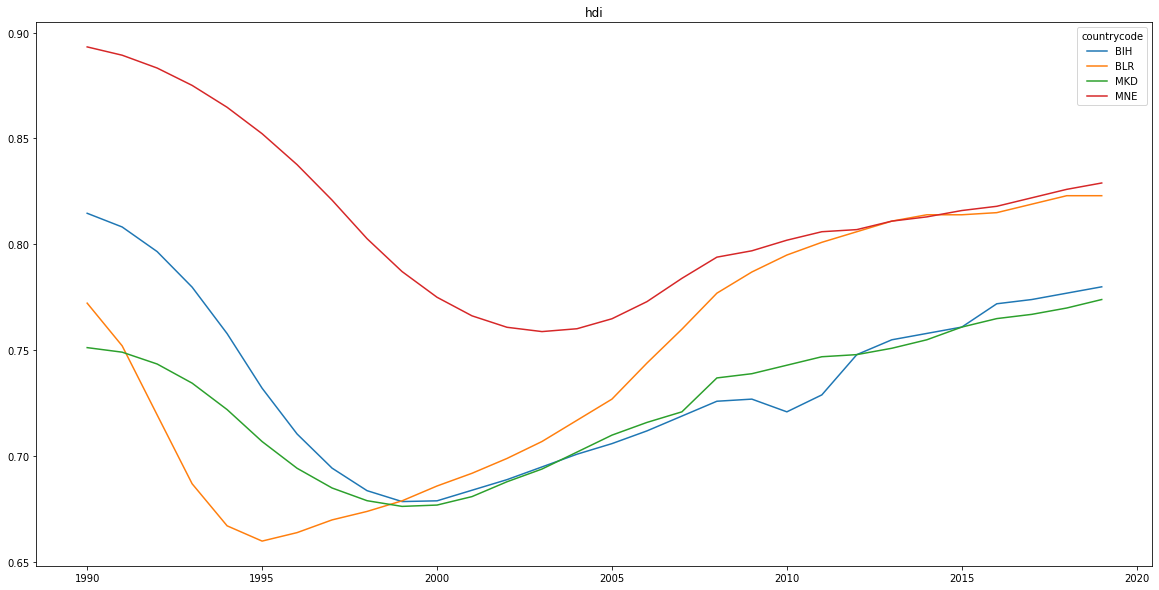

In [53]:
# data_hdi = data[['year','hdi']].copy()
# data.loc[(data.year > 2005) & (data.year < 2010), 'hdi'] = np.NaN

# data['hdi'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year > 2005) & (data.year < 2010)].hdi, data_hdi[(data_hdi.year > 2005) & (data_hdi.year < 2010)].hdi)
# 0.00015

# data['hdi'] = pd.Series(KNNImputer(n_neighbors=8).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 26])
# mean_squared_error(data[(data.year > 2005) & (data.year < 2010)].hdi, data_hdi[(data_hdi.year > 2005) & (data_hdi.year < 2010)].hdi)
# 0.00071

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['hdi'] > 0].countrycode

data['hdi'].interpolate(method = 'polynomial', order = 2, inplace = True)
# mean_squared_error(data[(data.year > 2005) & (data.year < 2010)].hdi, data_hdi[(data_hdi.year > 2005) & (data_hdi.year < 2010)].hdi)
# 0.00003

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='hdi').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='hdi')

### Net migration - best imputation

<AxesSubplot:title={'center':'net_migration'}>

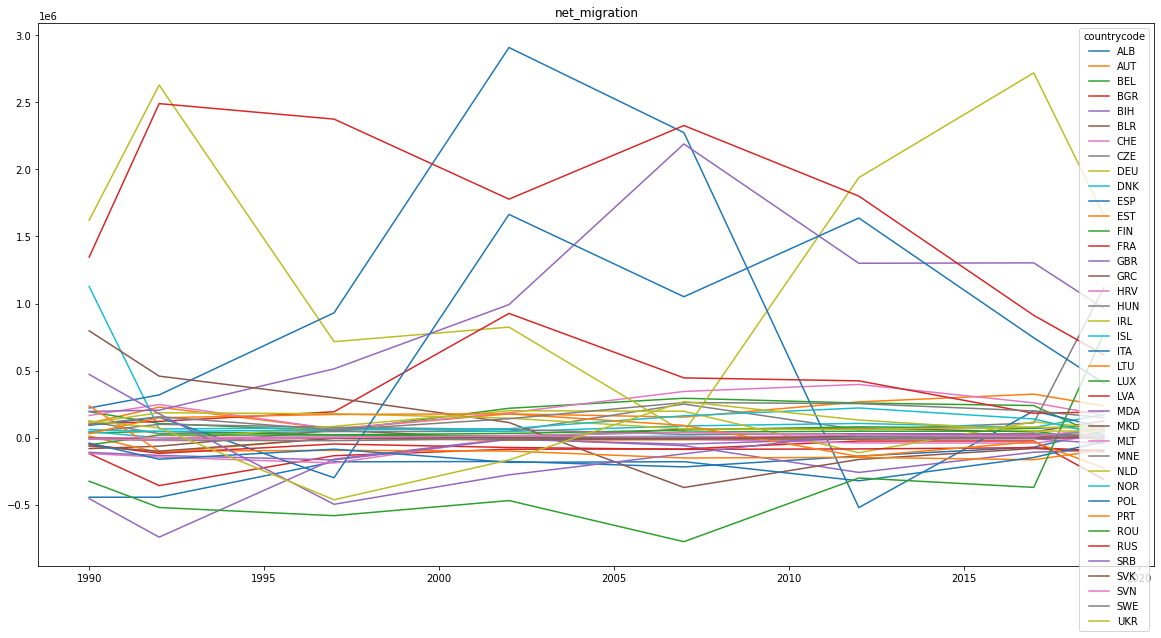

In [54]:
# data_net = data[['year','net_migration']].copy()
# data.loc[(data.year == 1997) | (data.year == 2007), 'net_migration'] = np.NaN

# data['net_migration'].fillna(method = 'ffill', inplace = True)
# mean_squared_error(data[(data.year == 1997) | (data.year == 2007)].net_migration, data_net[(data_net.year == 1997) | (data_net.year == 2007)].net_migration)
# 124854754745

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['net_migration'] > 0].countrycode

# data['net_migration'] = pd.Series(KNNImputer(n_neighbors=10).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 20])
# mean_squared_error(data[(data.year == 1997) | (data.year == 2007)].net_migration, data_net[(data_net.year == 1997) | (data_net.year == 2007)].net_migration)
# 183449855546

data['net_migration'].interpolate(method = 'linear', inplace = True)
data['net_migration'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year == 1997) | (data.year == 2007)].net_migration, data_net[(data_net.year == 1997) | (data_net.year == 2007)].net_migration)
# 113928087028

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='net_migration').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='net_migration')

## Outlier detection

In [55]:
for ind in data.columns[3:]:
    df_test = data[['countrycode','year', ind]]

    # transposing
    df_test_transposed = df_test.pivot_table(index='countrycode', columns=['year'], values=ind).reset_index()
    df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')

    fd = skfda.FDataGrid(df_test_final.T)
    out_detector = skfda.exploratory.outliers.LocalOutlierFactor(n_neighbors=21)
    print('Outliers for ', ind, ': ', out_detector.fit_predict(fd))

# out_detector = skfda.exploratory.outliers.IQROutlierDetector(factor=5)
# help(skfda.exploratory.outliers.neighbors_outlier)


Outliers for  pop :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers for  rgdpna :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers for  delta :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers for  xr :  [-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Outliers for  csh_c :  [-1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Outliers for  csh_i :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers for  csh_g :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers for  csh_x :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers for  csh_m :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers for  csh_r :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers for  rgdpna_per_cap :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

## Imputed original data

In [56]:
data.to_csv('data/data_original.csv', index=False)

## Transformations

In [70]:
from typing import Tuple
from scipy import stats
# Log transformation
def log_transformation(x: pd.Series) -> pd.Series:
    # Function np.log1p = log(x + 1)
    return np.log1p(x)

# Box-cox transformation
def box_cox_transformation(x: pd.Series) -> Tuple[np.array, float]:
    x_transformed, lambda_value = stats.boxcox(x)
    return x_transformed, lambda_value

In [71]:
data_log = pd.concat([data[['country', 'countrycode', 'year']], data.groupby(['country', 'countrycode', 'year']).apply(lambda x: log_transformation(x))], axis=1)

In [63]:
# box_cox_data = []
# box_cox_inverse_transform_lambda_map = {}
for group, group_df in data.groupby(['country', 'countrycode', 'year']):
    print(group)
    print(group_df)
#     box_cox_transformed_data, lambda_value = box_cox_transformation(group_df['demand'] + 1)
#     group_df['box_cox_transformation_demand'] = box_cox_transformed_data
#     box_cox_data.append(group_df)
#     box_cox_inverse_transform_lambda_map.update({group: lambda_value})
    
# box_cox_data = pd.concat(box_cox_data)

('Albania', 'ALB', 1990)
  countrycode  country  year       pop        rgdpna     delta       xr  \
0         ALB  Albania  1990  3.286073  15105.708008  0.029161  7.56297   

      csh_c     csh_i     csh_g     csh_x     csh_m     csh_r  rgdpna_per_cap  \
0  0.856953  0.106055  0.149501  0.042011 -0.039518 -0.115001     4596.887533   

   emp_percent  co2_emission  employment_agro  employment_industry  \
0    40.293633      1.840841            57.91                11.58   

   employment_services     export   import  inflation  net_migration  \
0                30.51  15.405064  24.0319  -0.431369      -443212.0   

   population_15_64  population_above_65  population_under_14  unemployment  \
0         61.730339             5.494978            32.774683         16.22   

   urban_population   hdi  
0            36.428  0.65  
('Albania', 'ALB', 1991)
  countrycode  country  year       pop        rgdpna     delta        xr  \
1         ALB  Albania  1991  3.280395  10875.786133  0.028

## Normalization

In [64]:
normalizer = MinMaxScaler()
data_norm = normalizer.fit_transform(data.drop(['countrycode', 'country', 'year'], axis=1))
data_norm = pd.DataFrame(data_norm, columns = data.columns[3:])
data = pd.concat([data[['countrycode', 'country', 'year']], data_norm], axis=1)
data.head()

,countrycode,country,year,pop,rgdpna,delta,xr,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,rgdpna_per_cap,emp_percent,co2_emission,employment_agro,employment_industry,employment_services,export,import,inflation,net_migration,population_15_64,population_above_65,population_under_14,unemployment,urban_population,hdi
0,ALB,Albania,1990,0.020464,0.002503,0.167317,0.026020,0.431002,0.179646,0.184381,0.016944,0.989945,0.160748,0.030174,0.510272,0.060476,0.996517,0.023402,0.039735,0.049912,0.119294,0.004960,0.089995,0.067646,0.000000,0.991639,0.426194,0.000000,0.102339
1,ALB,Albania,1991,0.020425,0.001522,0.157075,0.034107,0.413347,0.035870,0.411579,0.021471,0.963159,0.241134,0.016697,0.508400,0.041332,0.996517,0.023402,0.039735,0.013346,0.143878,0.015684,0.089995,0.047214,0.008780,0.997686,0.426194,0.004415,0.046784
2,ALB,Albania,1992,0.020192,0.001340,0.140917,0.111042,0.627589,0.026802,0.413877,0.025131,0.897425,0.000000,0.014535,0.398665,0.022663,1.000000,0.019692,0.038576,0.036498,0.509370,0.074598,0.089995,0.030435,0.018983,1.000000,0.429195,0.013325,0.000000
3,ALB,Albania,1993,0.019850,0.001564,0.129035,0.244767,0.522766,0.089182,0.290483,0.012249,0.929529,0.169197,0.018230,0.378940,0.021072,0.991468,0.024829,0.043709,0.052561,0.337982,0.042576,0.104310,0.018387,0.030310,0.998117,0.434379,0.022252,0.008772
4,ALB,Albania,1994,0.019521,0.001777,0.123867,0.325546,0.432460,0.129006,0.316586,0.007239,0.957387,0.232371,0.021862,0.420568,0.021918,0.982065,0.029395,0.050000,0.034116,0.211541,0.015782,0.118626,0.009089,0.041994,0.994057,0.435744,0.031260,0.026316


In [72]:
# normalizer = MinMaxScaler()
# data_log_norm = normalizer.fit_transform(data_log.drop(['countrycode', 'country', 'year'], axis=1))
# data_log_norm = pd.DataFrame(data_log_norm, columns = data.columns[3:])
# data_log = pd.concat([data[['countrycode', 'country', 'year']], data_log_norm], axis=1)
data_log.to_csv('data/data_log.csv', index=False)

## Smoothing

In [17]:
for ind in data.columns[3:]:
    df_test = data[['countrycode','year', ind]]

    # transposing
    df_test_transposed = df_test.pivot_table(index='countrycode', columns=['year'], values=ind).reset_index()
    df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')

    fd = skfda.FDataGrid(
        data_matrix=df_test_final.loc[:, df_test_final.columns != 'country']
    )

    smoother = skfda.preprocessing.smoothing.kernel_smoothers.NadarayaWatsonSmoother()
    fd_smooth = smoother.fit_transform(fd)    

    data_smooth = pd.DataFrame(fd_smooth.data_matrix.reshape(fd_smooth.data_matrix.shape[0], fd_smooth.data_matrix.shape[1]))
    data_smooth.columns = set(data['year'])

    temp = pd.DataFrame(set(data['countrycode']))
    temp.columns = ['countrycode']
    temp = temp.sort_values('countrycode').reset_index().countrycode
    data_smooth['countrycode'] = temp

    data[ind] = pd.melt(data_smooth, id_vars = 'countrycode').sort_values(['countrycode', 'variable']).reset_index(drop = True).value



In [18]:
data.to_csv('data/data.csv', index=False)